In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(color_codes=True)

In [2]:
# the tsv file is created from copy n' paste from ec2 pricing page
pricing = pd.read_csv('data/ec2-pricing.tsv', sep='\t')
pricing

,Instance Type,vCPU,ECU,Memory (GiB),Instance Storage (GB),Linux/UNIX Usage
0,t2.nano,1.0,Variable,0.50,EBS Only,$0.0065 per Hour
1,t2.micro,1.0,Variable,1.00,EBS Only,$0.013 per Hour
2,t2.small,1.0,Variable,2.00,EBS Only,$0.026 per Hour
3,t2.medium,2.0,Variable,4.00,EBS Only,$0.052 per Hour
4,t2.large,2.0,Variable,8.00,EBS Only,$0.104 per Hour
5,m4.large,2.0,6.5,8.00,EBS Only,$0.12 per Hour
6,m4.xlarge,4.0,13,16.00,EBS Only,$0.239 per Hour
7,m4.2xlarge,8.0,26,32.00,EBS Only,$0.479 per Hour
8,m4.4xlarge,16.0,53.5,64.00,EBS Only,$0.958 per Hour
9,m4.10xlarge,40.0,124.5,160.00,EBS Only,$2.394 per Hour


In [3]:
# only keep the m, c and r family as t2 has varied ecu and i or d family are priced based on disk
pricing = pricing[pd.notnull(pricing.ECU) & pricing['Instance Type'].str.match('^[mcr].*')]
pricing.ECU = pricing.ECU.astype(float)
pricing

/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:2698: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Instance Type,vCPU,ECU,Memory (GiB),Instance Storage (GB),Linux/UNIX Usage
5,m4.large,2.0,6.5,8.00,EBS Only,$0.12 per Hour
6,m4.xlarge,4.0,13.0,16.00,EBS Only,$0.239 per Hour
7,m4.2xlarge,8.0,26.0,32.00,EBS Only,$0.479 per Hour
8,m4.4xlarge,16.0,53.5,64.00,EBS Only,$0.958 per Hour
9,m4.10xlarge,40.0,124.5,160.00,EBS Only,$2.394 per Hour
10,m3.medium,1.0,3.0,3.75,1 x 4 SSD,$0.067 per Hour
11,m3.large,2.0,6.5,7.50,1 x 32 SSD,$0.133 per Hour
12,m3.xlarge,4.0,13.0,15.00,2 x 40 SSD,$0.266 per Hour
13,m3.2xlarge,8.0,26.0,30.00,2 x 80 SSD,$0.532 per Hour
15,c4.large,2.0,8.0,3.75,EBS Only,$0.105 per Hour


In [4]:
pricing['price_per_hour'] = pricing['Linux/UNIX Usage'].str.extract('\$(\d+.\d+)', expand=True).astype(float)
pricing

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Instance Type,vCPU,ECU,Memory (GiB),Instance Storage (GB),Linux/UNIX Usage,price_per_hour
5,m4.large,2.0,6.5,8.00,EBS Only,$0.12 per Hour,0.120
6,m4.xlarge,4.0,13.0,16.00,EBS Only,$0.239 per Hour,0.239
7,m4.2xlarge,8.0,26.0,32.00,EBS Only,$0.479 per Hour,0.479
8,m4.4xlarge,16.0,53.5,64.00,EBS Only,$0.958 per Hour,0.958
9,m4.10xlarge,40.0,124.5,160.00,EBS Only,$2.394 per Hour,2.394
10,m3.medium,1.0,3.0,3.75,1 x 4 SSD,$0.067 per Hour,0.067
11,m3.large,2.0,6.5,7.50,1 x 32 SSD,$0.133 per Hour,0.133
12,m3.xlarge,4.0,13.0,15.00,2 x 40 SSD,$0.266 per Hour,0.266
13,m3.2xlarge,8.0,26.0,30.00,2 x 80 SSD,$0.532 per Hour,0.532
15,c4.large,2.0,8.0,3.75,EBS Only,$0.105 per Hour,0.105


0.996359558442


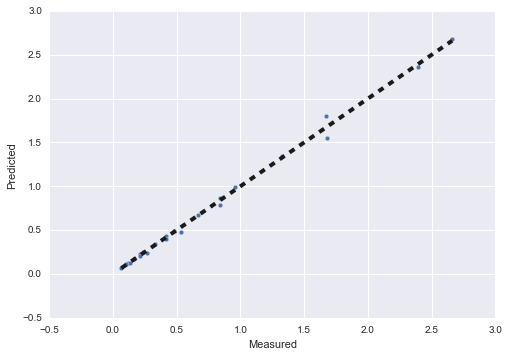

[ 0.01068192  0.00636988] 0.00950465018976


In [5]:
from sklearn.linear_model import LinearRegression

X = pricing[['ECU', 'Memory (GiB)']].values
y = pricing['price_per_hour'].values
lr = LinearRegression(fit_intercept=True, normalize=False)
lr.fit(X, y)
predicted = lr.predict(X)

print lr.score(X, y)
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print lr.coef_, lr.intercept_

In [6]:
def predict_price(r):
    return 0.01 + 0.01 * r['ECU'] + 0.006 * r['Memory (GiB)']

pricing['predict_price'] = pricing.apply(predict_price, axis=1)


rmse = np.sqrt(np.sum(np.power(pricing['predict_price'] - pricing['price_per_hour'], 2)) / len(pricing))
print 'rmse: {}'.format(rmse)
pricing

rmse: 0.0747757062822


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Instance Type,vCPU,ECU,Memory (GiB),Instance Storage (GB),Linux/UNIX Usage,price_per_hour,predict_price
5,m4.large,2.0,6.5,8.00,EBS Only,$0.12 per Hour,0.120,0.1230
6,m4.xlarge,4.0,13.0,16.00,EBS Only,$0.239 per Hour,0.239,0.2360
7,m4.2xlarge,8.0,26.0,32.00,EBS Only,$0.479 per Hour,0.479,0.4620
8,m4.4xlarge,16.0,53.5,64.00,EBS Only,$0.958 per Hour,0.958,0.9290
9,m4.10xlarge,40.0,124.5,160.00,EBS Only,$2.394 per Hour,2.394,2.2150
10,m3.medium,1.0,3.0,3.75,1 x 4 SSD,$0.067 per Hour,0.067,0.0625
11,m3.large,2.0,6.5,7.50,1 x 32 SSD,$0.133 per Hour,0.133,0.1200
12,m3.xlarge,4.0,13.0,15.00,2 x 40 SSD,$0.266 per Hour,0.266,0.2300
13,m3.2xlarge,8.0,26.0,30.00,2 x 80 SSD,$0.532 per Hour,0.532,0.4500
15,c4.large,2.0,8.0,3.75,EBS Only,$0.105 per Hour,0.105,0.1125


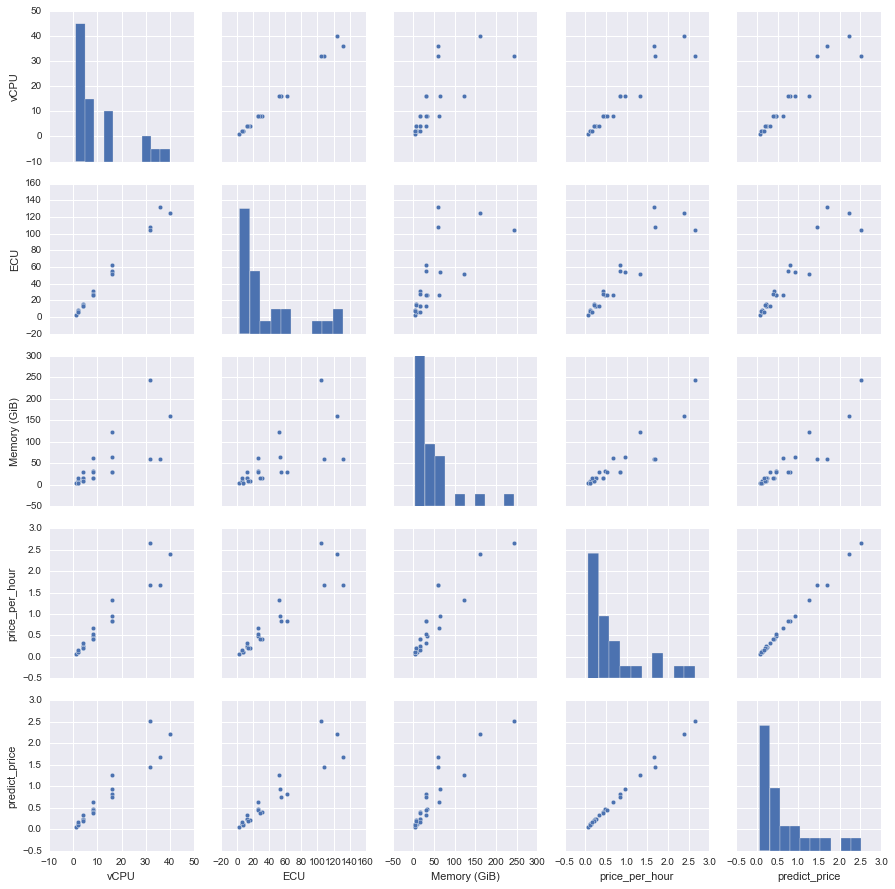

In [7]:
sns.pairplot(pricing)